In [1]:
import pandas as pd
pd.set_option("display.max_columns", 100)

In [2]:
import plotly.express as px
from plotly.offline import plot
from IPython.display import Image

Install pip install -U kaleido to allow static plotly outputs

In [3]:
fraud_df = pd.read_csv('transaction_dataset_copy.csv')

In [4]:
fraud_df.head()

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [42]:
fraud_df['FLAG'].value_counts()

0    7631
1    1350
Name: FLAG, dtype: int64

In [5]:
fraud_counts_df = fraud_df['FLAG'].value_counts(normalize=True).reset_index(name='Proportion')

In [74]:
fraud_counts_sum_df = fraud_df['FLAG'].value_counts().reset_index(name='Sum')

In [6]:
fraud_counts_df.columns = ['Fraud_Flag', 'Proportion']

In [7]:
def createBarChart(df, x, y, title):
    fig = px.bar(df, x=x, y=y, title=title)
    return fig

In [8]:
def plotFigure(fig):
    plot(fig)

In [9]:
def createBytesImage(fig):
    img_bytes = fig.to_image(format="png")
    return Image(img_bytes)

In [10]:
fig_fraud= createBarChart(fraud_counts_df, "Fraud_Flag", "Proportion", "Proportion of Fraud in Dataset")
plotFigure(fig_fraud)

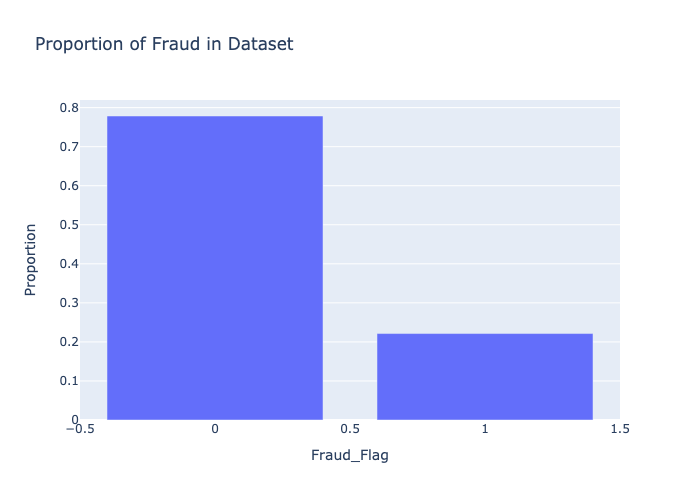

In [11]:
createBytesImage(fig_fraud)

In [76]:
fraud_counts_sum_df.columns = ['Fraud_Flag', 'Proportion']
fig_fraud_sum= createBarChart(fraud_counts_sum_df, "Fraud_Flag", "Proportion", "Proportion of Fraud in Dataset")
plotFigure(fig_fraud_sum)

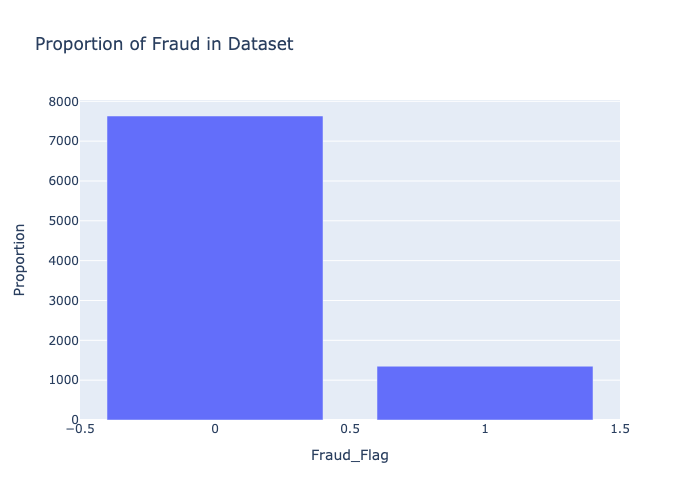

In [77]:
createBytesImage(fig_fraud_sum)

In [12]:
fraud_df.Address.value_counts()

0x4cd526aa2db72eb1fd557b37c6b0394acd35b212    2
0x4cd3bb2110eda1805dc63abc1959a5ee2d386e9f    2
0x4c1da8781f6ca312bc11217b3f61e5dfdf428de1    2
0x4c24af967901ec87a6644eb1ef42b680f58e67f5    2
0x4c268c7b1d51b369153d6f1f28c61b15f0e17746    2
                                             ..
0x57b417366e5681ad493a03492d9b61ecd0d3d247    1
0x57bb2d6426fed243c633d0b16d4297d12bc20638    1
0x57c0cf70020f0af5073c24cb272e93e7529c6a40    1
0x57ccf2b7ffe5e4497a7e04ac174646f5f16e24ce    1
0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c    1
Name: Address, Length: 9816, dtype: int64

This verifies that there are no accounts that have transactions several times

What ERC20 token types correspond to fraud or not

In [29]:
sent_token_type_df = fraud_df[['FLAG',' ERC20 most sent token type']]
rec_token_type_df = fraud_df[['FLAG',' ERC20_most_rec_token_type']]

In [40]:
sent_tok_df_grouped = sent_token_type_df.groupby([' ERC20 most sent token type'])['FLAG'].value_counts().unstack(fill_value=0)
sent_tok_df_grouped.to_csv('ERC20_sent_tok_type_flag.csv')

In [41]:
rec_token_type_df_grouped = rec_token_type_df.groupby([' ERC20_most_rec_token_type'])['FLAG'].value_counts().unstack(fill_value=0)
rec_token_type_df_grouped.to_csv('ERC20_rec_tok_type_flag.csv')

In [52]:
rec_token_type_df_grouped.reset_index(inplace=True)

In [53]:
rec_token_type_df_grouped.head()

FLAG,ERC20_most_rec_token_type,0,1
0,,3,0
1,,1,20
2,$P4C3,1,0
3,0,4399,0
4,0xBitcoin Token,1,0


In [55]:
fig_toks= createBarChart(rec_token_type_df_grouped, " ERC20_most_rec_token_type", 1, "Token types")
plotFigure(fig_toks)

Examining each of these it looks like certain token types tend to be fraudulent. We can build a model based on the token type, this could be easily biased though. But it nicely illustrates the problem. 

We can also look to see if there are any clear correlations in the dataset. 

In [27]:
fraud_df = fraud_df.dropna(thresh=200, axis=1)
fraud_df = fraud_df.loc[:, (fraud_df != 0).any(axis=0)]

fraud_df.to_csv('trimmed_transaction_dataset.csv')

In [25]:
corr_df = fraud_df[fraud_df.columns.difference(['Address',' ERC20 most sent token type', ' ERC20_most_rec_token_type'])]
corr_df.head()

,ERC20 avg val rec,ERC20 avg val sent,ERC20 max val rec,ERC20 max val sent,ERC20 min val rec,ERC20 min val sent,ERC20 total Ether received,ERC20 total Ether sent contract,ERC20 total ether sent,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 uniq rec token name,ERC20 uniq sent addr,ERC20 uniq sent addr.1,ERC20 uniq sent token name,Total ERC20 tnxs,Avg min between received tnx,Avg min between sent tnx,FLAG,Index,Number of Created Contracts,Received Tnx,Sent tnx,Time Diff between first and last (Mins),Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,avg value sent to contract,max val sent,max val sent to contract,max value received,min val sent,min value received,min value sent to contract,total Ether sent,total ether balance,total ether received,total ether sent contracts,total transactions (including tnx to create contract
0,265586.147600,271779.920000,1.500000e+07,1.683100e+07,0.0,0.000000,3.558854e+07,0.0,3.560317e+07,54.0,58.0,57.0,30.0,0.0,39.0,265.0,1093.71,844.26,0,1,0,89,721,704785.63,40,118,6.589513,1.200681,0.0,31.220000,0.0,45.806785,0.00,0.000000,0.0,865.691093,-279.224419,586.466675,0.0,810
1,57.632615,2.260809,3.650000e+02,2.260809e+00,0.0,2.260809,4.034283e+02,0.0,2.260809e+00,5.0,7.0,7.0,1.0,0.0,1.0,8.0,2958.44,12709.07,0,2,0,8,94,1218216.73,5,14,0.385685,0.032844,0.0,1.800000,0.0,2.613269,0.00,0.000000,0.0,3.087297,-0.001819,3.085478,0.0,102
2,65.189009,0.000000,4.428198e+02,0.000000e+00,0.0,0.000000,5.215121e+02,0.0,0.000000e+00,7.0,8.0,8.0,0.0,0.0,0.0,8.0,2434.02,246194.54,0,3,0,10,2,516729.30,10,2,0.358906,1.794308,0.0,3.538616,0.0,1.165453,0.05,0.113119,0.0,3.588616,0.000441,3.589057,0.0,12
3,1555.550174,3804.076893,1.141223e+04,9.029231e+03,0.0,100.000000,1.711105e+04,0.0,1.141223e+04,11.0,11.0,11.0,2.0,0.0,1.0,14.0,15785.09,10219.60,0,4,0,9,25,397555.90,7,13,99.488840,70.001834,0.0,450.000000,0.0,500.000000,0.00,0.000000,0.0,1750.045862,-854.646303,895.399559,0.0,34
4,4934.232147,13726.659220,9.000000e+04,4.500000e+04,0.0,0.000000,1.628297e+05,0.0,1.235399e+05,23.0,27.0,27.0,4.0,0.0,6.0,42.0,10707.77,36.61,0,5,1,20,4598,382472.42,7,19,2.671095,0.022688,0.0,9.000000,0.0,12.802411,0.00,0.000000,0.0,104.318883,-50.896986,53.421897,0.0,4619


In [26]:
corr = corr_df.astype('float64').corr()
corr.style.background_gradient(cmap='coolwarm')

,ERC20 avg val rec,ERC20 avg val sent,ERC20 max val rec,ERC20 max val sent,ERC20 min val rec,ERC20 min val sent,ERC20 total Ether received,ERC20 total Ether sent contract,ERC20 total ether sent,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 uniq rec token name,ERC20 uniq sent addr,ERC20 uniq sent addr.1,ERC20 uniq sent token name,Total ERC20 tnxs,Avg min between received tnx,Avg min between sent tnx,FLAG,Index,Number of Created Contracts,Received Tnx,Sent tnx,Time Diff between first and last (Mins),Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,avg value sent to contract,max val sent,max val sent to contract,max value received,min val sent,min value received,min value sent to contract,total Ether sent,total ether balance,total ether received,total ether sent contracts,total transactions (including tnx to create contract
ERC20 avg val rec,1.000000,-0.000140,0.859800,-0.000135,-0.000503,-0.000224,0.859858,-0.000184,0.000200,0.003024,0.021172,0.021940,0.001057,0.003120,0.013441,0.000574,-0.005604,-0.003119,0.007903,-0.001772,0.002053,0.019644,0.009174,0.048931,0.003826,0.005739,-0.000118,0.014168,0.000247,0.026016,0.000059,0.002443,-0.000692,-0.002845,0.000574,0.001904,-0.001001,0.001207,0.000059,0.019002
ERC20 avg val sent,-0.000140,1.000000,-0.000094,0.999952,-0.000292,0.999785,-0.000069,-0.000194,0.999566,-0.000797,-0.002089,-0.002113,-0.000464,-0.000561,-0.000520,-0.000774,-0.003751,-0.001964,0.025036,0.001929,-0.000071,-0.000881,-0.001399,-0.006797,-0.000515,-0.000833,-0.000378,-0.001674,-0.000184,-0.000413,-0.000166,-0.000316,-0.000371,-0.001482,-0.000147,-0.000265,-0.000070,-0.000308,-0.000166,-0.001401
ERC20 max val rec,0.859800,-0.000094,1.000000,-0.000090,-0.000341,-0.000132,0.999967,-0.000144,-0.000001,0.005313,0.027453,0.028353,0.002595,0.000997,0.017571,0.003108,-0.003559,-0.002451,-0.004325,-0.000673,0.000920,0.015793,0.004475,0.046662,0.001718,0.003921,0.001356,0.018987,0.000277,0.031625,0.000117,0.003993,-0.000412,-0.001673,0.000526,0.002915,-0.001257,0.002031,0.000117,0.013582
ERC20 max val sent,-0.000135,0.999952,-0.000090,1.000000,-0.000308,0.999729,-0.000059,-0.000201,0.999649,-0.000420,-0.000827,-0.000834,-0.000249,-0.000581,0.001085,-0.000459,-0.003804,-0.002019,0.025030,0.001977,0.000148,-0.000702,-0.000989,-0.006261,-0.000218,-0.000415,-0.000382,-0.001688,-0.000187,-0.000194,-0.000170,-0.000294,-0.000384,-0.001534,-0.000148,-0.000205,-0.000118,-0.000280,-0.000170,-0.001024
ERC20 min val rec,-0.000503,-0.000292,-0.000341,-0.000308,1.000000,0.006787,-0.000353,-0.000523,-0.000327,-0.002313,-0.006481,-0.006572,-0.001223,-0.001499,-0.002797,-0.002166,-0.008360,0.004688,0.011125,-0.001765,-0.000790,-0.004413,-0.003826,-0.010503,-0.001934,-0.002356,-0.000651,-0.002948,-0.000502,-0.001124,-0.000452,-0.001079,-0.000493,-0.001167,-0.000407,-0.000840,-0.000185,-0.000949,-0.000452,-0.005287
ERC20 min val sent,-0.000224,0.999785,-0.000132,0.999729,0.006787,1.000000,-0.000137,-0.000202,0.999311,-0.000862,-0.002323,-0.002361,-0.000492,-0.000584,-0.000636,-0.000820,-0.003781,-0.001685,0.025356,0.002164,-0.000093,-0.001883,-0.001543,-0.006846,-0.001028,-0.000981,-0.000387,-0.001981,-0.000194,-0.000514,-0.000175,-0.000449,-0.000388,-0.001503,-0.000158,-0.000304,-0.000054,-0.000335,-0.000175,-0.002180
ERC20 total Ether received,0.859858,-0.000069,0.999967,-0.000059,-0.000353,-0.000137,1.000000,-0.000151,0.000100,0.006311,0.029894,0.030788,0.003324,0.000976,0.018168,0.004296,-0.003671,-0.002537,-0.004487,-0.000656,0.002071,0.016944,0.006939,0.046940,0.002899,0.006187,0.004473,0.019348,0.000772,0.032885,0.000426,0.006229,-0.000426,-0.001731,0.001242,0.003718,-0.001744,0.002498,0.000426,0.015879
ERC20 total Ether sent contract,-0.000184,-0.000194,-0.000144,-0.000201,-0.000523,-0.000202,-0.000151,1.000000,-0.000213,0.012104,0.036789,0.036657,-0.000935,0.274612,-0.003139,0.006076,-0.006198,-0.004409,0.013492,0.003290,-0.000376,0.107389,-0.002884,-0.008370,0.120900,-0.001890,-0.000332

In [65]:
time_df = fraud_df[['Time Diff between first and last (Mins)','FLAG']]

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


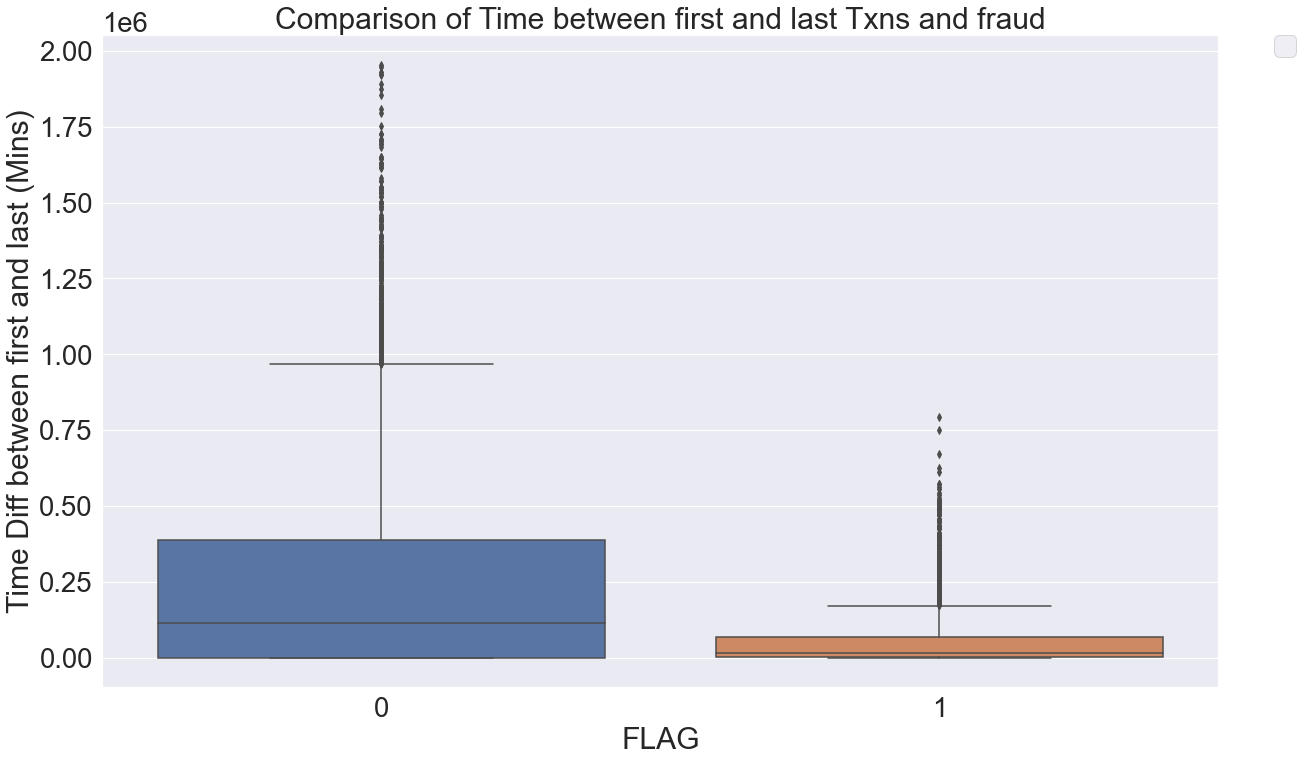

In [73]:


plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="FLAG", y="Time Diff between first and last (Mins)", data=time_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Time between first and last Txns and fraud')
plt.savefig('./fraud_vs_time.png',dpi=300)

No handles with labels found to put in legend.


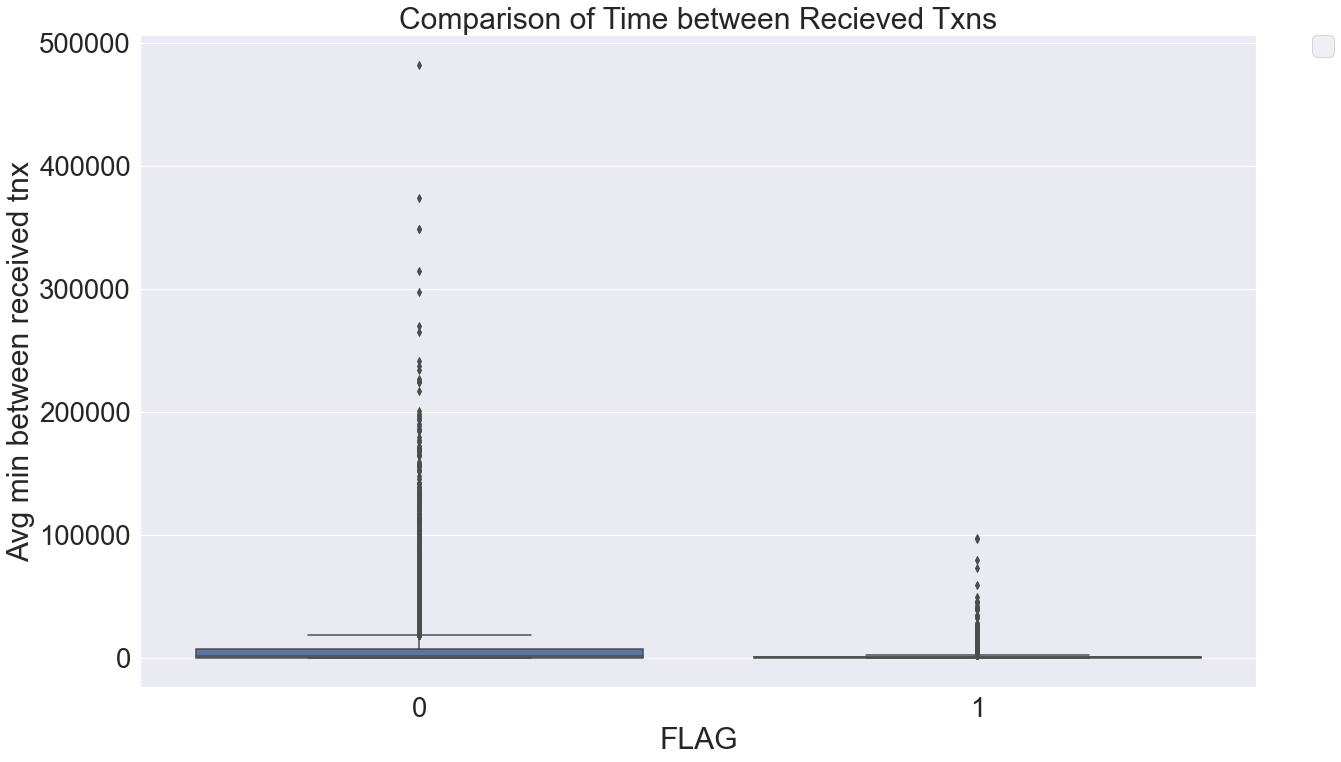

In [72]:


plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="FLAG", y="Avg min between received tnx", data=fraud_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Time between Recieved Txns')
plt.savefig('./fraud_vs_time_recieved.png',dpi=300)